In [74]:
import seaborn as sns
df = sns.load_dataset('geyser')
target_names = df['kind'].unique()

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['kind'] = le.fit_transform(df['kind'])

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[["duration"]] = scaler.fit_transform(df[["duration"]])
df[["waiting"]] = scaler.fit_transform(df[["waiting"]])

In [77]:
y = df['kind']
X = df.drop(columns='kind')

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size= 0.20)

In [79]:
from sklearn.neighbors import KNeighborsClassifier  
classifier= KNeighborsClassifier(n_neighbors=7, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

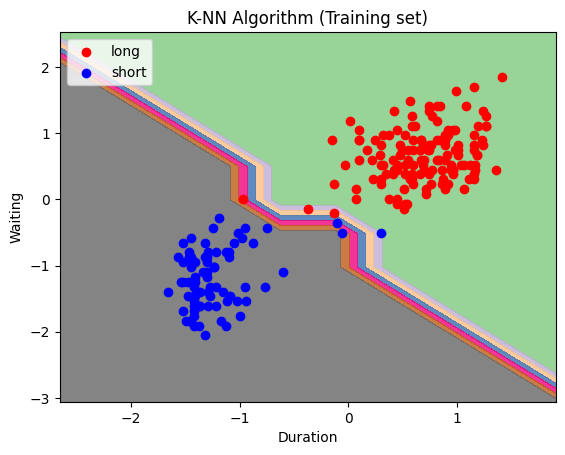

In [80]:
import numpy as np
import matplotlib.pyplot as plt

x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1

y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1

h = min((x_max - x_min) / 10, (y_max - y_min) / 10)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colours = ['red','blue']
for colour, i, target in zip(colours, [0,1], target_names):
    plt.scatter(X_train[y_train==i,0],X_train[y_train==i, 1], color=colour, label= target)
    
plt.title('K-NN Algorithm (Training set)')
plt.xlabel('Duration')
plt.ylabel('Waiting')
plt.legend(loc='best', shadow=False)

In [81]:
y_pred = classifier.predict(X_test)

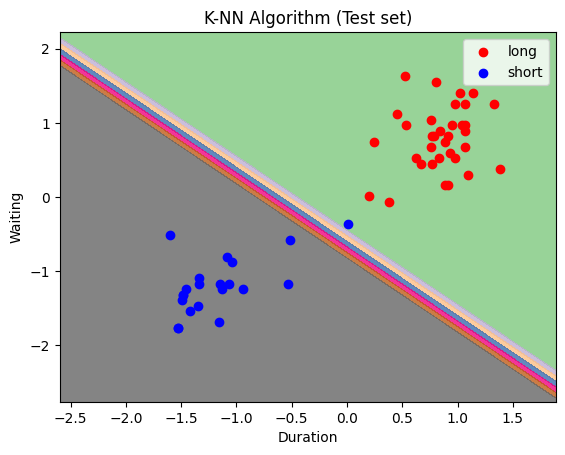

In [82]:
x_min = X_test[:, 0].min() - 1
x_max = X_test[:, 0].max() + 1

y_min = X_test[:, 1].min() - 1
y_max = X_test[:, 1].max() + 1

h = min((x_max - x_min) / 10, (y_max - y_min) / 10)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colours = ['red','blue']
for colour, i, target in zip(colours, [0,1], target_names):
    plt.scatter(X_test[y_test==i,0],X_test[y_test==i, 1], color=colour, label= target)

plt.title('K-NN Algorithm (Test set)')
plt.xlabel('Duration')
plt.ylabel('Waiting')
plt.legend(loc='best', shadow=False)

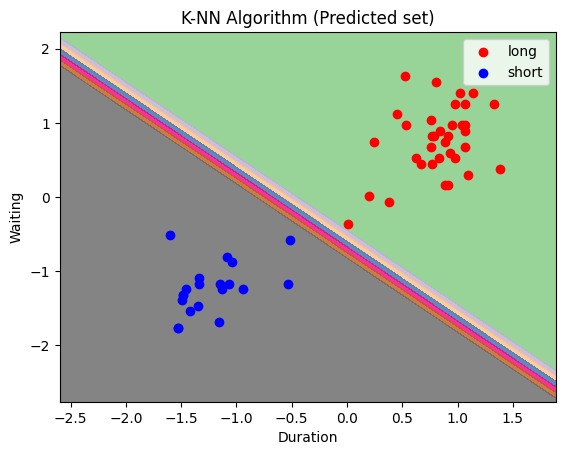

In [83]:
x_min = X_test[:, 0].min() - 1
x_max = X_test[:, 0].max() + 1

y_min = X_test[:, 1].min() - 1
y_max = X_test[:, 1].max() + 1

h = min((x_max - x_min) / 10, (y_max - y_min) / 10)

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = classifier.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Accent, alpha=0.8)

colours = ['red','blue']
for colour, i, target in zip(colours, [0,1], target_names):
    plt.scatter(X_test[y_pred==i,0],X_test[y_pred==i, 1], color=colour, label= target)

plt.title('K-NN Algorithm (Predicted set)')
plt.xlabel('Duration')
plt.ylabel('Waiting')
plt.legend(loc='best', shadow=False)

In [84]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, recall_score, r2_score, accuracy_score, confusion_matrix, f1_score, precision_score

f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

p = precision_score(y_test, y_pred)
print("Precision Score:",p)

r = recall_score(y_test, y_pred)
print("Recall Score:",r)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

a = accuracy_score(y_test, y_pred)
print("Accuracy Score:", a)

cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ")
print(cm)

print("Full report : ")
print(classification_report(y_test, y_pred))

F1 Score: 0.975609756097561
Mean Squared Error: 0.01818181818181818
Precision Score: 1.0
Recall Score: 0.9523809523809523
Mean Absolute Error: 0.01818181818181818
R-squared: 0.92296918767507
Accuracy Score: 0.9818181818181818
Confusion Matrix : 
[[34  0]
 [ 1 20]]
Full report : 
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.95      0.98        21

    accuracy                           0.98        55
   macro avg       0.99      0.98      0.98        55
weighted avg       0.98      0.98      0.98        55



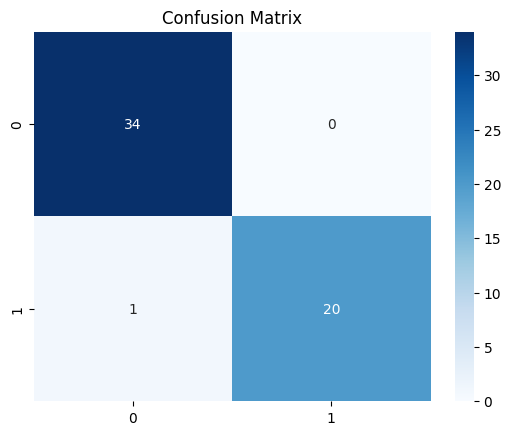

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
plt.show()